In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

In [9]:
d1 = np.loadtxt("../plot_data/TMD/TMDPDF_1.dat",skiprows=1)[:, :]
d2 = np.loadtxt("../plot_data/TMD/TMDPDF_2.dat",skiprows=1)[:, :]
d3= np.loadtxt("../plot_data/TMD/TMDFF_1.dat",skiprows=1)[:, :]
d4 = np.loadtxt("../plot_data/TMD/TMDFF_2.dat",skiprows=1)[:, :]

x11 = d1[:,1]
x21 = d2[:,0]
x31 = d3[:,1]
x41 = d4[:,0]
x1 = x11[0:100]
x2 = x21[0:100]
x3 = x31[0:100]
x4 = x41[0:100]

r11 = d1[:,4]
r21 = d2[:,4]
r31 = d3[:,4]
r41 = d4[:,4]
r1 = r11[0:100]
r2 = r21[0:100]
r3 = r31[0:100]
r4 = r41[0:100]

print(x1)

[0.01       0.02       0.03       0.04       0.05       0.06
 0.07       0.08       0.09       0.09999999 0.11       0.12
 0.13       0.14       0.14999999 0.16       0.17       0.17999999
 0.19       0.19999999 0.20999999 0.22       0.22999999 0.23999999
 0.25       0.25999999 0.26999998 0.28       0.28999999 0.29999998
 0.31       0.31999999 0.32999998 0.34       0.34999999 0.35999998
 0.37       0.38       0.38999999 0.39999998 0.41       0.41999999
 0.42999998 0.44       0.44999999 0.45999998 0.47       0.47999999
 0.48999998 0.5        0.50999999 0.51999998 0.52999997 0.53999996
 0.55000001 0.56       0.56999999 0.57999998 0.58999997 0.59999996
 0.61000001 0.62       0.63       0.63999999 0.64999998 0.65999997
 0.66999996 0.68000001 0.69       0.69999999 0.70999998 0.71999997
 0.72999996 0.74000001 0.75       0.75999999 0.76999998 0.77999997
 0.78999996 0.79999995 0.81       0.81999999 0.82999998 0.83999997
 0.84999996 0.85999995 0.87       0.88       0.88999999 0.89999998
 0.9099

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


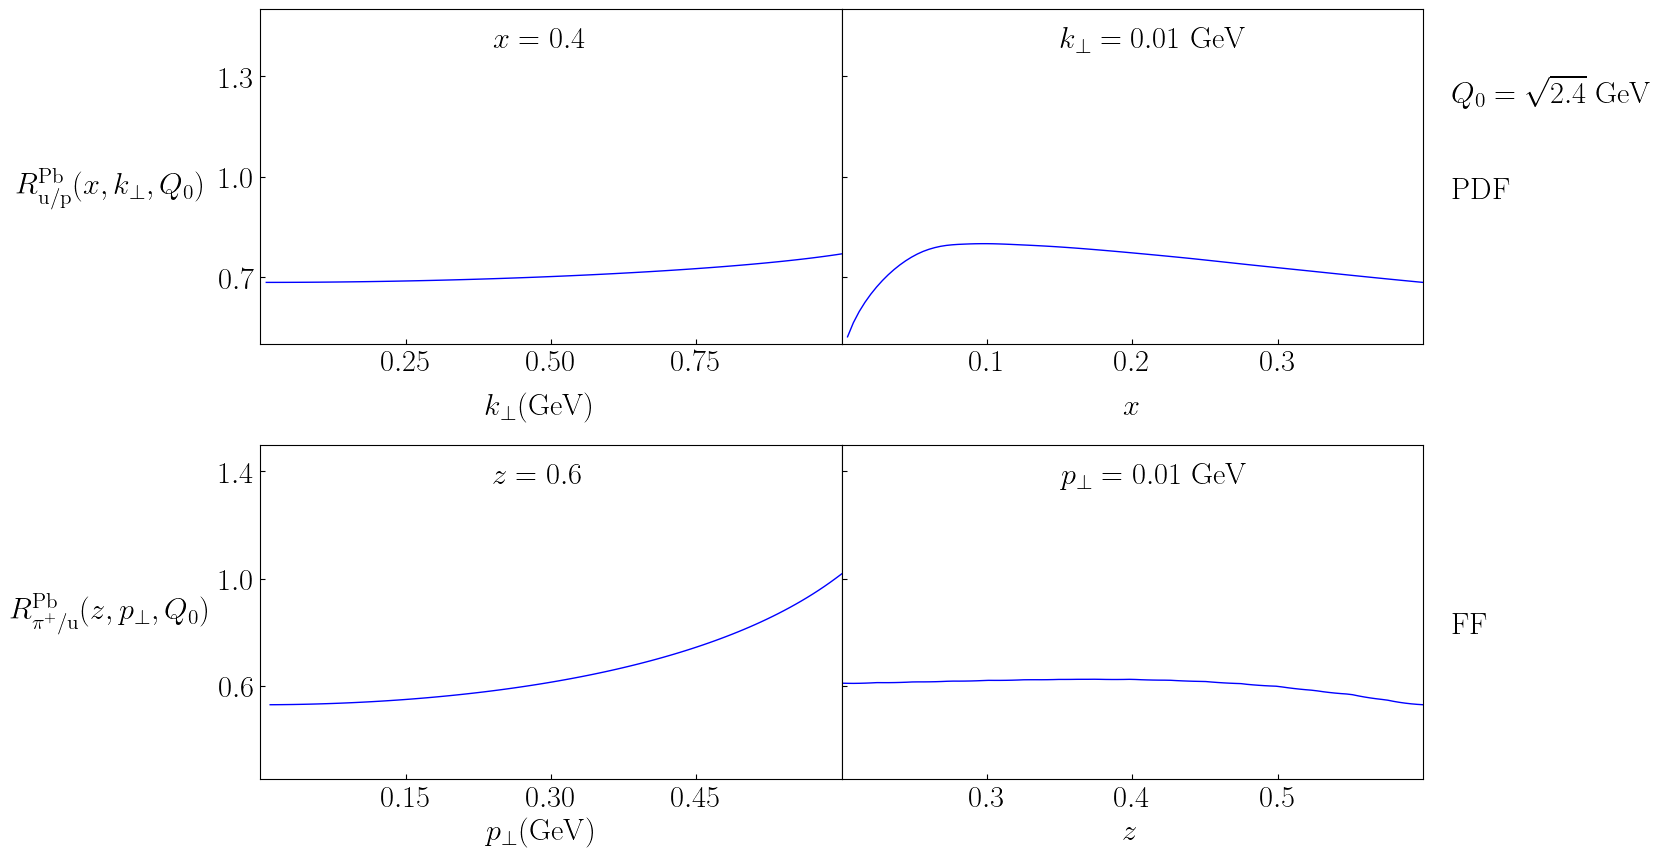

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey='row',
                        gridspec_kw={'hspace': 0.3, 'wspace': 0})

m=np.array([[0,1],[2,3]])

## Set Size of Font
SizeOfFont = 22

## Set Figure Size
fig.set_size_inches(15,10)

## Plot      
axes[0,0].plot(x1,r1, color = 'blue', linewidth = 1)
axes[0,1].plot(x2,r2, color = 'blue', linewidth = 1)
axes[1,0].plot(x3,r3, color = 'blue', linewidth = 1)
axes[1,1].plot(x4,r4, color = 'blue', linewidth = 1)

## For the Legend
#axes[0,2].plot(pt0,c0[2], color = 'gold', label = r'\rm C', linewidth = 1)
#axes[0,2].plot(pt0,fe0[2], color = 'red',label = r'\rm Fe',linewidth=1)
#axes[0,2].plot(pt0,pb0[2], color = 'black',label = r'\rm Pb',linewidth=1)  
axes[0,1].legend(frameon = False,fontsize = SizeOfFont,loc='upper center', bbox_to_anchor=(1.1,0.95))

## Axis Limits
axes[0,0].set_xlim(0,1) 
axes[0,1].set_xlim(0,0.4)
axes[1,0].set_xlim(0,0.6)
axes[1,1].set_xlim(0.2,0.6)

axes[0,0].set_ylim(0.5,1.5)
axes[1,0].set_ylim(0.25,1.5)

## Axis Labels
distanceFromAxis = 45
fig.text(0.025, 0.7, r"\rm $R_\mathrm{u/p}^\mathrm{Pb}(x,k_\perp,Q_0)$", ha='center', va='center',fontsize = SizeOfFont,rotation = 0)
fig.text(0.025, 0.275, r"\rm $R_\mathrm{\pi^+/u}^\mathrm{Pb}(z,p_\perp,Q_0)$", ha='center', va='center',fontsize = SizeOfFont,rotation = 0)

fig.text(0.275, 0.475,r"\rm $ k_\perp (\mathrm{GeV})$",fontsize = SizeOfFont,rotation = 0)
fig.text(0.7, 0.475, r"\rm $ x $",fontsize = SizeOfFont,rotation = 0)
fig.text(0.275, 0.05, r"\rm $ p_\perp (\mathrm{GeV})$",fontsize = SizeOfFont,rotation = 0)
fig.text(0.7, 0.05, r"\rm $ z $",fontsize = SizeOfFont,rotation = 0)
############## Axis Ticks
for i in range(2):
    for j in range(2):
        axes[i,j].tick_params(direction ='in',labelsize = SizeOfFont)

axes[0,0].set_yticks([0.7,1,1.3])
axes[1,0].set_yticks([0.6,1,1.4])

axes[0,0].set_xticks([0.25,0.5,0.75])
axes[0,1].set_xticks([0.1,0.2,0.3])
axes[1,0].set_xticks([0.15,0.3,0.45])
axes[1,1].set_xticks([0.3,0.4,0.5])

## Code for Textboxes 
props = dict(boxstyle='round', facecolor='gray', alpha=0)
axes[0,0].text(0.4, 0.95, r"\rm $x=0.4$ ",transform=axes[0,0].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)
axes[0,1].text(0.375, 0.95, r"\rm $k_\perp=0.01 \ \mathrm{GeV}$ ",transform=axes[0,1].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props) 
axes[1,0].text(0.4, 0.95, r"\rm $z=0.6$ ",transform=axes[1,0].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)
axes[1,1].text(0.375, 0.95, r"\rm $p_\perp=0.01 \ \mathrm{GeV}$ ",transform=axes[1,1].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)
axes[0,1].text(1.05, 0.5, r"\rm $\mathrm{PDF}$ ",transform=axes[0,1].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)
axes[1,1].text(1.05, 0.5, r"\rm $\mathrm{FF}$ ",transform=axes[1,1].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)
axes[0,1].text(1.05, 0.8, r"\rm $Q_0=\sqrt{2.4} \ \mathrm{GeV}$ ",transform=axes[0,1].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)

## Save Figure
plt.tight_layout()
plt.show()
fig.savefig('TMD_sqrt(2.4).pdf', bbox_inches = "tight")

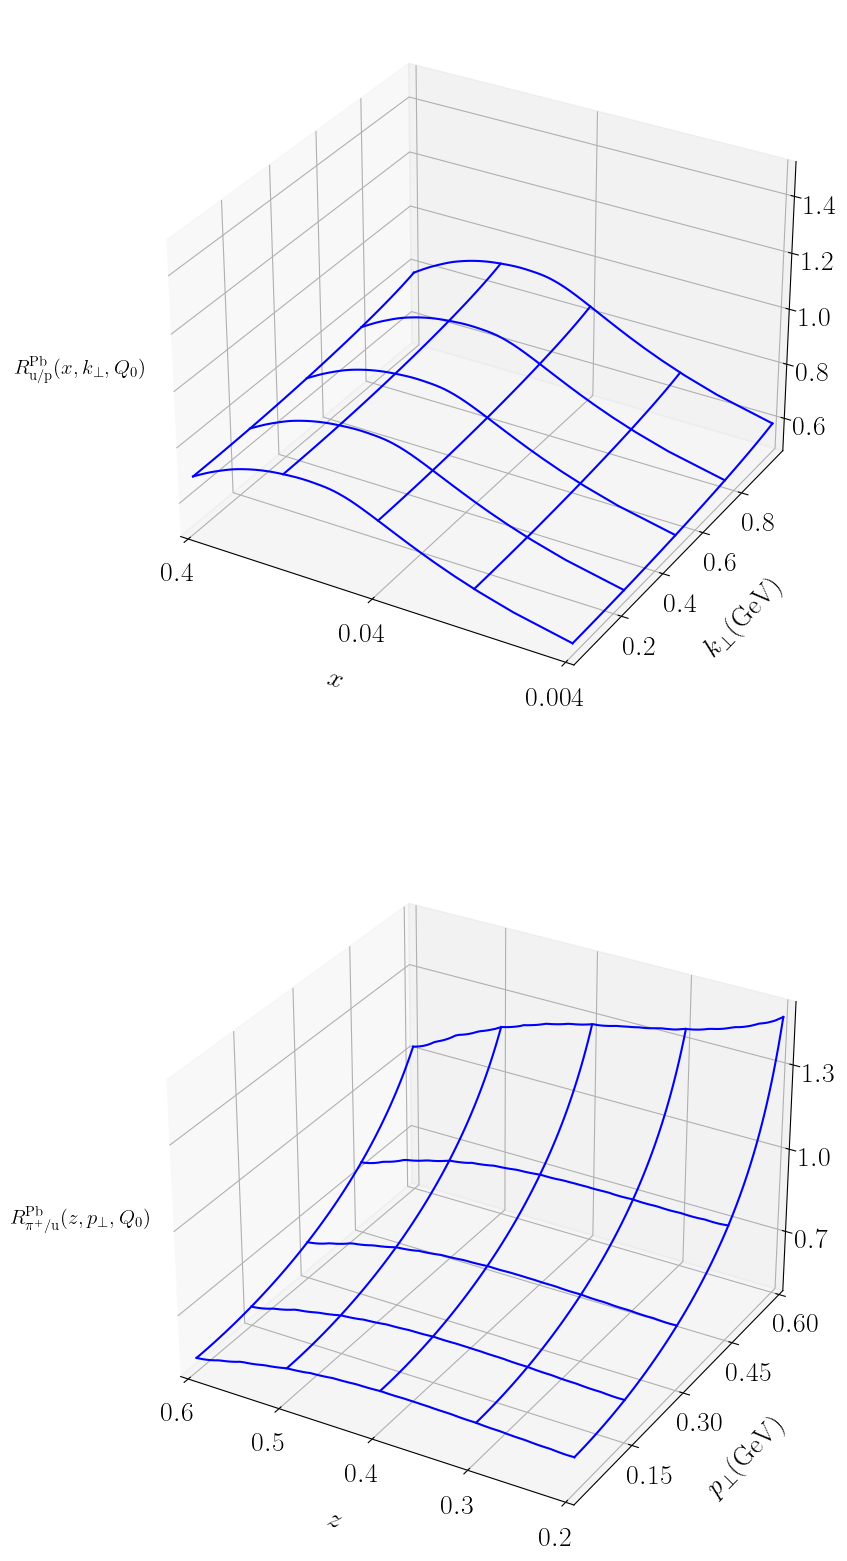

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 20  # Change global font size

fig = plt.figure(figsize=(30, 20))

# Create first 3D subplot
ax1 = fig.add_subplot(2, 1, 1, projection='3d')

# Draw the curves
for i in range(5):
    ax1.plot(np.log10(d1[100*i:100*(i+1),0]), d1[100*i:100*(i+1),1], d1[100*i:100*(i+1),4], color='blue')
    ax1.plot(np.log10(d2[100*i:100*(i+1),0]), d2[100*i:100*(i+1),1], d2[100*i:100*(i+1),4], color='blue')

ax1.set_xlabel(' $ x $', labelpad=20)
ax1.set_ylabel(' $ k_\perp (\mathrm{GeV})$', labelpad=20)
ax1.zaxis.set_rotate_label(False)  # Disable automatic rotation

ax1.set_xlim(np.log10(0.4), np.log10(0.004))  # Reverse the x-axis
ax1.set_xticks(np.log10([0.004, 0.04, 0.4]))  # Set x ticks
ax1.set_xticklabels([r'$0.004$', r'$0.04$', r'$0.4$'])  # Set x tick labels
ax1.set_ylim(0, 1)
ax1.set_yticks([0.2,0.4,0.6,0.8])  # Set kT ticks
ax1.set_zlim(0.5, 1.5)
ax1.set_zticks([0.6,0.8,1.0,1.2,1.4])

# Create second 3D subplot
ax2 = fig.add_subplot(2, 1, 2, projection='3d')
for i in range(5):
    ax2.plot(d3[100*i:100*(i+1),0], d3[100*i:100*(i+1),1], d3[100*i:100*(i+1),4], color='blue')
    ax2.plot(d4[100*i:100*(i+1),0], d4[100*i:100*(i+1),1], d4[100*i:100*(i+1),4], color='blue')

ax2.set_xlabel(' $ z $', labelpad=20)
ax2.set_ylabel(' $ p_\perp (\mathrm{GeV})$', labelpad=20)
ax2.zaxis.set_rotate_label(False)  # Disable automatic rotation

ax2.set_xlim(0.6, 0.2)  # Reverse the x-axis
ax2.set_xticks([0.6,0.5,0.4,0.3, 0.2])  # Set x ticks
ax2.set_xticklabels([r'$0.6$', r'$0.5$', r'$0.4$', r'$0.3$', r'$0.2$'])  # Set x tick labels
ax2.set_ylim(0, 0.6)
ax2.set_yticks([0.15,0.3,0.45,0.6])  # Set kT ticks
ax2.set_zlim(0.5, 1.5)
ax2.set_zticks([0.7,1,1.3])

fig.text(0.38, 0.7, r"\rm $R_\mathrm{u/p}^\mathrm{Pb}(x,k_\perp,Q_0)$", ha='center', va='center',fontsize = 15,rotation = 0)
fig.text(0.38, 0.275, r"\rm $R_\mathrm{\pi^+/u}^\mathrm{Pb}(z,p_\perp,Q_0)$", ha='center', va='center',fontsize = 15,rotation = 0)

plt.show()
fig.savefig('TMD3d.pdf', bbox_inches = "tight", dpi=200)



In [5]:
d1 = np.loadtxt("../plot_data/TMD/TMDPDF_3.dat",skiprows=1)[:, :]
d2 = np.loadtxt("../plot_data/TMD/TMDPDF_4.dat",skiprows=1)[:, :]
d3= np.loadtxt("../plot_data/TMD/TMDFF_3.dat",skiprows=1)[:, :]
d4 = np.loadtxt("../plot_data/TMD/TMDFF_4.dat",skiprows=1)[:, :]

x1 = d1[:,1]
x2 = d2[:,0]
x3 = d3[:,1]
x4 = d4[:,0]

r1 = d1[:,4]
r2 = d2[:,4]
r3 = d3[:,4]
r4 = d4[:,4]

print(x4)

[0.2        0.20404041 0.20808081 0.21212122 0.21616162 0.22020203
 0.22424243 0.22828284 0.23232323 0.23636365 0.24040404 0.24444444
 0.24848485 0.25252527 0.25656566 0.26060605 0.26464647 0.26868689
 0.27272728 0.27676767 0.28080809 0.28484848 0.2888889  0.29292929
 0.29696971 0.3010101  0.30505052 0.30909091 0.31313133 0.31717172
 0.32121211 0.32525253 0.32929295 0.33333334 0.33737373 0.34141415
 0.34545457 0.34949496 0.35353535 0.35757577 0.36161619 0.36565655
 0.36969697 0.37373739 0.37777779 0.38181818 0.3858586  0.38989902
 0.39393941 0.3979798  0.40202022 0.40606064 0.41010103 0.41414142
 0.41818184 0.42222226 0.42626262 0.43030304 0.43434346 0.43838385
 0.44242424 0.44646466 0.45050508 0.4545455  0.45858586 0.46262628
 0.4666667  0.47070706 0.47474748 0.4787879  0.48282832 0.48686868
 0.4909091  0.49494952 0.49898994 0.5030303  0.50707072 0.51111114
 0.51515156 0.51919192 0.52323234 0.52727276 0.53131312 0.53535354
 0.53939396 0.54343438 0.54747474 0.55151516 0.55555558 0.5595

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


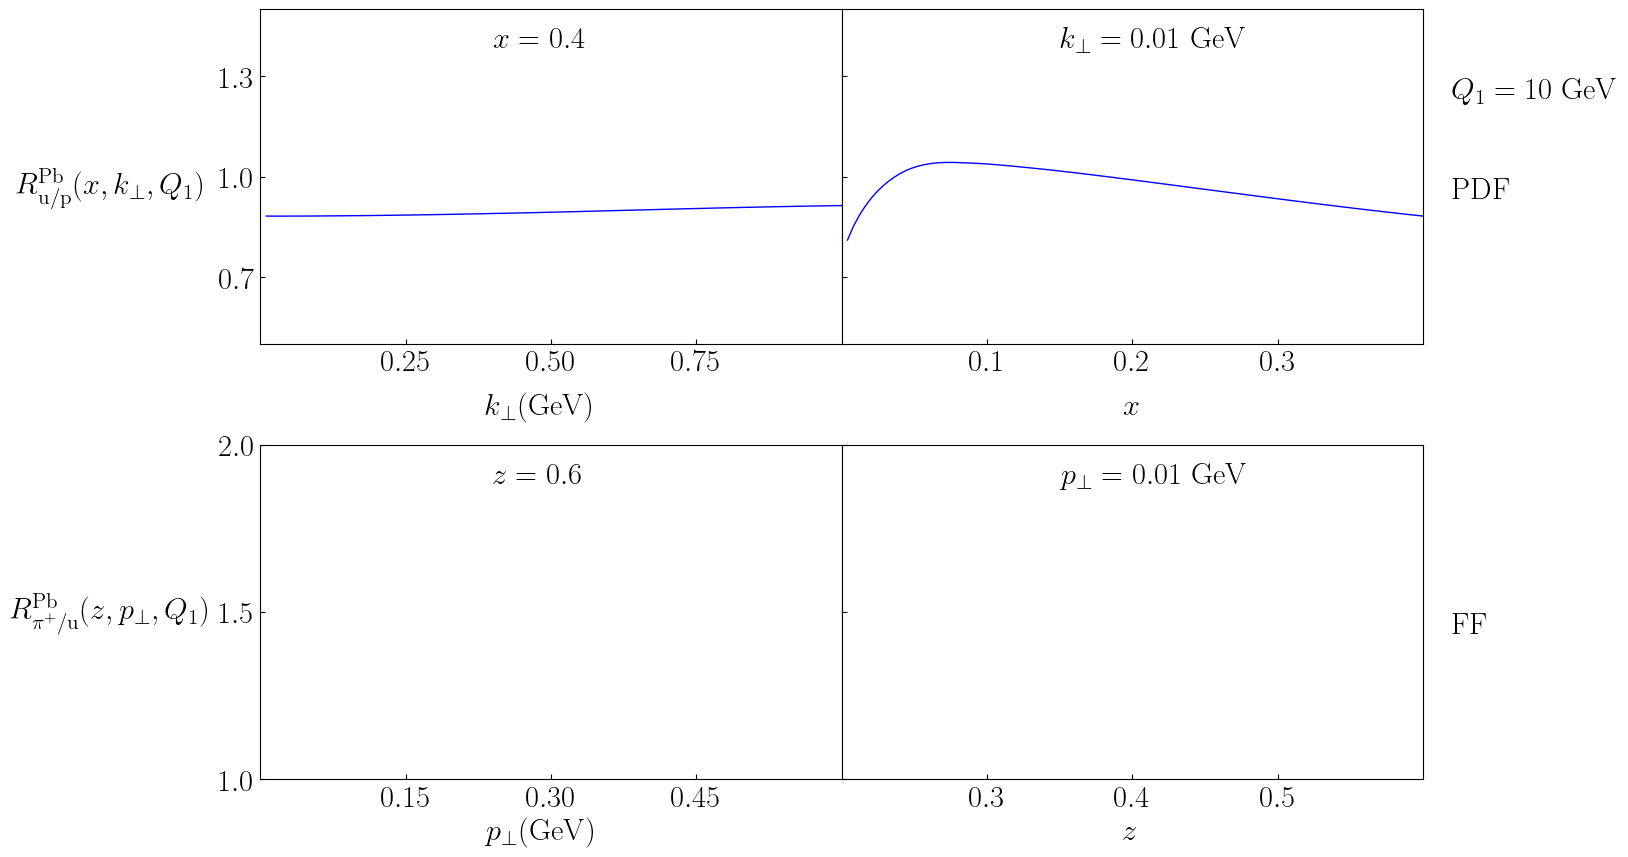

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey='row',
                        gridspec_kw={'hspace': 0.3, 'wspace': 0})

m=np.array([[0,1],[2,3]])

## Set Size of Font
SizeOfFont = 22

## Set Figure Size
fig.set_size_inches(15,10)

## Plot      
axes[0,0].plot(x1,r1, color = 'blue', linewidth = 1)
axes[0,1].plot(x2,r2, color = 'blue', linewidth = 1)
axes[1,0].plot(x3,r3, color = 'blue', linewidth = 1)
axes[1,1].plot(x4,r4, color = 'blue', linewidth = 1)

## For the Legend
#axes[0,2].plot(pt0,c0[2], color = 'gold', label = r'\rm C', linewidth = 1)
#axes[0,2].plot(pt0,fe0[2], color = 'red',label = r'\rm Fe',linewidth=1)
#axes[0,2].plot(pt0,pb0[2], color = 'black',label = r'\rm Pb',linewidth=1)  
axes[0,1].legend(frameon = False,fontsize = SizeOfFont,loc='upper center', bbox_to_anchor=(1.1,0.95))

## Axis Limits
axes[0,0].set_xlim(0,1)
axes[0,1].set_xlim(0,0.4)
axes[1,0].set_xlim(0,0.6)
axes[1,1].set_xlim(0.2,0.6)

axes[0,0].set_ylim(0.5,1.5)
axes[1,0].set_ylim(1,2)

## Axis Labels
distanceFromAxis = 45
fig.text(0.025, 0.7, r"\rm $R_\mathrm{u/p}^\mathrm{Pb}(x,k_\perp,Q_1)$", ha='center', va='center',fontsize = SizeOfFont,rotation = 0)
fig.text(0.025, 0.275, r"\rm $R_\mathrm{\pi^+/u}^\mathrm{Pb}(z,p_\perp,Q_1)$", ha='center', va='center',fontsize = SizeOfFont,rotation = 0)

fig.text(0.275, 0.475,r"\rm $ k_\perp (\mathrm{GeV})$",fontsize = SizeOfFont,rotation = 0)
fig.text(0.7, 0.475, r"\rm $ x $",fontsize = SizeOfFont,rotation = 0)
fig.text(0.275, 0.05, r"\rm $ p_\perp (\mathrm{GeV})$",fontsize = SizeOfFont,rotation = 0)
fig.text(0.7, 0.05, r"\rm $ z $",fontsize = SizeOfFont,rotation = 0)
############## Axis Ticks
for i in range(2):
    for j in range(2):
        axes[i,j].tick_params(direction ='in',labelsize = SizeOfFont)

axes[0,0].set_yticks([0.7,1,1.3])
axes[1,0].set_yticks([1.0,1.5,2])

axes[0,0].set_xticks([0.25,0.5,0.75])
axes[0,1].set_xticks([0.1,0.2,0.3])
axes[1,0].set_xticks([0.15,0.3,0.45])
axes[1,1].set_xticks([0.3,0.4,0.5])

## Code for Textboxes 
props = dict(boxstyle='round', facecolor='gray', alpha=0)
axes[0,0].text(0.4, 0.95, r"\rm $x=0.4$ ",transform=axes[0,0].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)
axes[0,1].text(0.375, 0.95, r"\rm $k_\perp=0.01 \ \mathrm{GeV}$ ",transform=axes[0,1].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props) 
axes[1,0].text(0.4, 0.95, r"\rm $z=0.6$ ",transform=axes[1,0].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)
axes[1,1].text(0.375, 0.95, r"\rm $p_\perp=0.01 \ \mathrm{GeV}$ ",transform=axes[1,1].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)
axes[0,1].text(1.05, 0.5, r"\rm $\mathrm{PDF}$ ",transform=axes[0,1].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)
axes[1,1].text(1.05, 0.5, r"\rm $\mathrm{FF}$ ",transform=axes[1,1].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)
axes[0,1].text(1.05, 0.8, r"\rm $Q_1=10 \ \mathrm{GeV}$ ",transform=axes[0,1].transAxes, fontsize=SizeOfFont,
    verticalalignment='top', bbox=props)

## Save Figure
plt.tight_layout()
plt.show()
fig.savefig('TMD_10.pdf', bbox_inches = "tight")